In [4]:
import sklearn as scikit_learn
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [58]:
# obtenir le data et target en format numpy
data, target= load_breast_cancer(return_X_y=True)
data.shape, target.shape

((569, 30), (569,))

In [59]:
# obtenir le data et target en format dictionnaire ou la colonne data en un dataframe
df= load_breast_cancer(as_frame=True)

In [83]:
df.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [95]:
df.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
# transformer data et target qui sont des dataframe en format numpy
df_y = df.target.to_numpy()
df_x = df.data.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [89]:
# Mise au format Numpy des données
#labelliser les patients sains par la valeur 0 et les patients malades par la valeur 
target_invert= 1 - target

In [190]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target_invert, test_size=0.198, stratify=target_invert,random_state=0)


In [191]:
xtrain.shape, xtest.shape,ytrain.shape, ytest.shape

((456, 30), (113, 30), (456,), (113,))

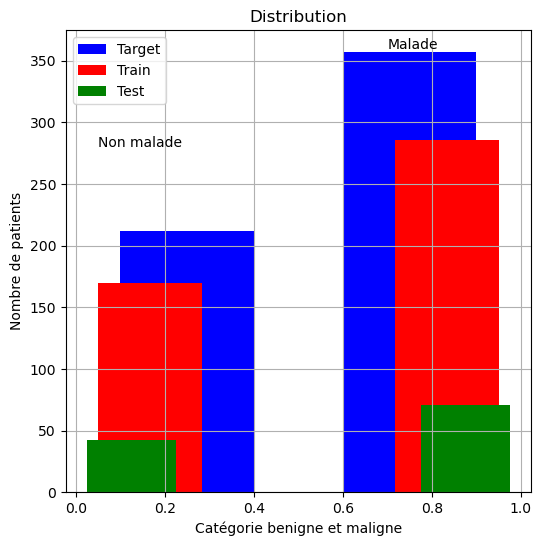

In [192]:
# Concaténer la feature et la variable cible pour obtenir le jeu de données initial
plt.figure(1, figsize=(6,6)) # Création d'une figure

# premiere courbe
plt.hist(target_invert, bins=2, color='blue', rwidth=0.6, label='Target')
# deuxieme courbe
plt.hist(ytrain, bins=3, color='red', rwidth=0.7, label='Train')
# troisième courbe
plt.hist(ytest, bins=4, color='green', rwidth=0.8, label='Test')
# Extra informations
plt.grid()
plt.title('Distribution') # titre
plt.xlabel('Catégorie benigne et maligne') # axes abscisses
plt.ylabel('Nombre de patients') # axes ordonnées
plt.legend() # legend
plt.text(x=0.05, y=280, s='Non malade')
plt.text(x=0.7, y=360, s='Malade')
plt.savefig('figure_1.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure

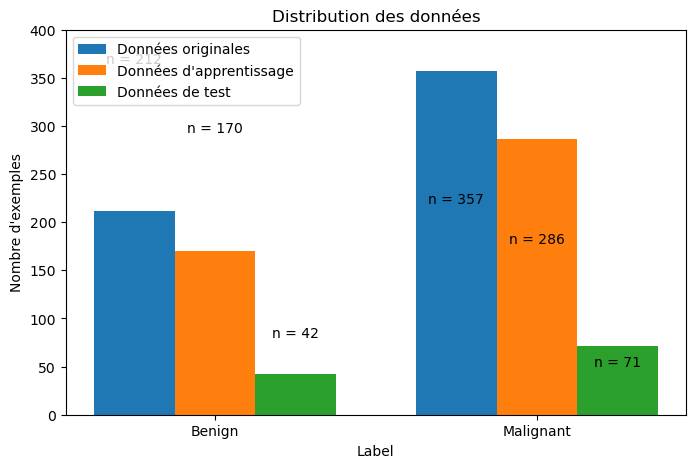

In [193]:
plt.figure(figsize=(8,5), dpi=100)

plt.title("Distribution des données")

plt.hist([target_invert, ytrain, ytest],
         bins = [x - 0.5 for x in range(0, 3)],
         rwidth=0.75,
         label=["Données originales", "Données d'apprentissage", "Données de test"])

plt.annotate("n = " + str(np.sum(target_invert == 0)), (-0.25, 365.0), ha='center')
plt.annotate("n = " + str(np.sum(ytrain == 0)), (0.0, 293.0), ha='center')
plt.annotate("n = " + str(np.sum(ytest == 0)), (0.25, 80.0), ha='center')

plt.annotate("n = " + str(np.sum(target_invert == 1)), (0.75, 220.0), ha='center')
plt.annotate("n = " + str(np.sum(ytrain == 1)), (1.0, 178.0), ha='center')
plt.annotate("n = " + str(np.sum(ytest == 1)), (1.25, 50.0), ha='center')

plt.xticks(np.arange(2), ("Benign", "Malignant"))

plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")

plt.ylim(0.0, 400.0)

plt.legend()

plt.show()

### Normalisation

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.1, max_iter = 10000)
model.fit(xtrain, ytrain)
y_pred_test = model.predict(xtest)
y_pred_test

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

In [196]:
ytest

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

### Calculer et afficher les performances obtenues sur le jeu de test

### Matrice de confusion

In [197]:
# Affichage de la matrice de confusion et du rapport de classification
confusion_test = confusion_matrix(ytest, y_pred_test)
print("Matrice de confusion :\n", confusion_test)

Matrice de confusion :
 [[38  4]
 [ 0 71]]


<Axes: >

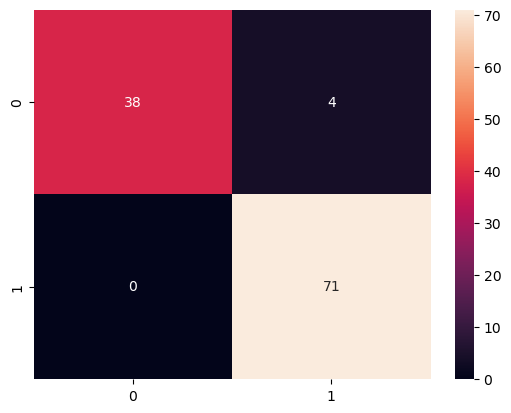

In [198]:
sns.heatmap(confusion_test, annot=True)

### Taux de classification, Rappel, Précision et F1-Score

In [199]:
# Calcul du taux de classification
accuracy = np.sum(np.diag(confusion_test)) / np.sum(confusion_test)
print("Taux de classification :", accuracy)
accuracy2= accuracy_score(ytest, y_pred_test)

print("accuracy2 :", accuracy2)
# Calcul du rappel (recall)
recall = confusion_test[1, 1] / (confusion_test[1, 0] + confusion_test[1, 1])
print("Rappel :", recall)

# Calcul de la précision
precision = confusion_test[1, 1] / (confusion_test[0, 1] + confusion_test[1, 1])
print("Précision :", precision)

# Calcul du F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score :", f1_score)


Taux de classification : 0.9646017699115044
accuracy2 : 0.9646017699115044
Rappel : 1.0
Précision : 0.9466666666666667
F1-Score : 0.9726027397260273


### Courbe ROC, AUC

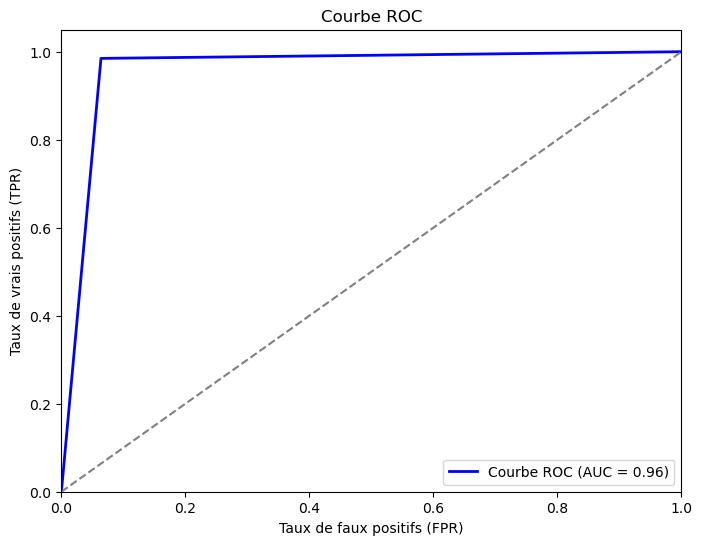

Aire sous la courbe (AUC) : 0.9605093488072212


In [162]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(ytest, y_pred_test)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Affichage de l'AUC
print("Aire sous la courbe (AUC) :", roc_auc)


### Calculer et afficher les performances obtenues sur le jeu d'apprentissage 

In [180]:
y_pred_train = model.predict(xtrain)


### Matrice de confusion

In [166]:
# Affichage de la matrice de confusion et du rapport de classification
confusion_train = confusion_matrix(ytrain, y_pred_train)
print("Matrice de confusion :\n", confusion)

Matrice de confusion :
 [[159   6]
 [  1 290]]


<Axes: >

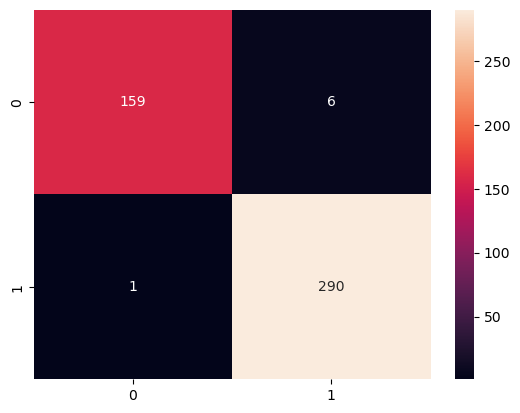

In [200]:
sns.heatmap(confusion_train, annot=True, fmt="")

### Taux de classification, Rappel, Précision et F1-Score

In [179]:
# Calcul du taux de classification
accuracy = np.sum(np.diag(confusion_train)) / np.sum(confusion_train)
print("Taux de classification/accuracy :", accuracy)

result1 = accuracy_score(ytrain, y_pred_train)
print('Accuracy is: ', result1)

# Calcul du rappel (recall)
recall = confusion_train[1, 1] / (confusion_train[1, 0] + confusion_train[1, 1])
print("Rappel :", recall)

# Calcul de la précision
precision = confusion_train[1, 1] / (confusion_train[0, 1] + confusion_train[1, 1])
print("Précision :", precision)

# Calcul du F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score :", f1_score)

Taux de classification/accuracy : 0.9846491228070176
Accuracy is:  0.9846491228070176
Rappel : 0.9965635738831615
Précision : 0.9797297297297297
F1-Score : 0.9880749574105622


### Courbe ROC, AUC

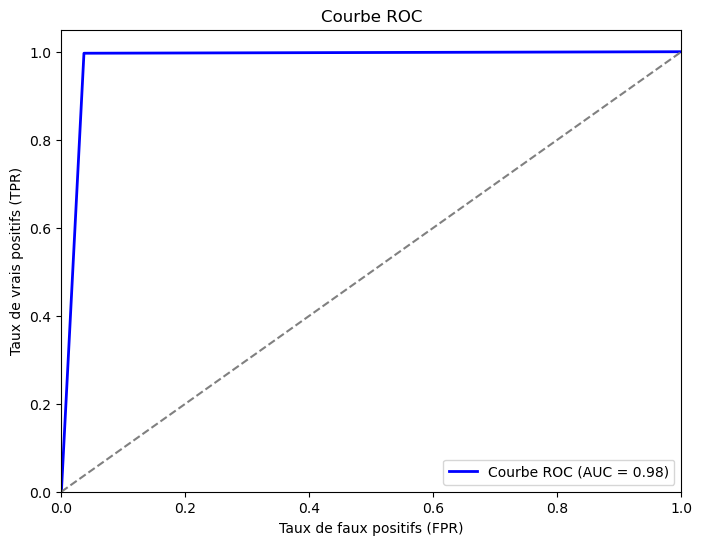

Aire sous la courbe (AUC) : [0.         0.03636364 1.        ] [0.         0.99656357 1.        ] [2 1 0]
Aire sous la courbe (AUC) : 0.9800999687597626


In [175]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(ytrain, y_pred_train)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Affichage de l'AUC
print("Aire sous la courbe (AUC) :",fpr, tpr, thresholds)
print("Aire sous la courbe (AUC) :", roc_auc)

array([0.        , 0.03636364, 1.        ])